  Using cached decorator-5.0.9-py3-none-any.whl (8.9 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Uninstalling decorator-5.0.6:
      Successfully uninstalled decorator-5.0.6


In [1]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.1.1
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0

In [1]:
from datetime import datetime

In [2]:
import pandas as pd

In [3]:
from pybliometrics.scopus import ScopusSearch
import pybliometrics

In [4]:
# Example 1: dowload papers by search query, count time and number of papers: University of Padua (Italy), Artificial Intelligence papers dated later than 2011
# Download
start = datetime.now().replace(microsecond=0)
ds1 = ScopusSearch("SUBJMAIN(1701) AND AF-ID (60000481) AND  PUBYEAR  >  2011")
end = datetime.now().replace(microsecond=0)
print(end-start)

0:00:15


In [5]:
print(len(ds1.results))

96


In [6]:
from itertools import combinations

import networkx as nx
import matplotlib.pyplot as plt
from pybliometrics.scopus import ScopusSearch

In [8]:
# Example 2: co-authorship network. University of Padua, psychology, 2019 - present

In [7]:
ds2 = ScopusSearch("AF-ID(60000481)  AND  SUBJAREA (psyc) AND PUBYEAR > 2018")
print(len(ds2.results)) # execution may take up to a few minutes

1264


In [9]:
ds2.results[0] # first paper metadata: investigate the author id field format

Document(eid='2-s2.0-85123719417', doi='10.1016/j.cognition.2021.104944', pii='S001002772100367X', pubmed_id=None, title='An undeniable interplay: Both numerosity and visual features affect estimation of non-symbolic stimuli', subtype='ar', subtypeDescription='Article', creator='Abalo-Rodríguez I.', afid='60027282;60000481', affilname='Universidad Complutense de Madrid;Università degli Studi di Padova', affiliation_city='Madrid;Padua', affiliation_country='Spain;Italy', author_count='3', author_names='Abalo-Rodríguez, I.;De Marco, D.;Cutini, S.', author_ids='57431477600;57214068215;24398373500', author_afids='60000481-60027282;60000481;60000481', coverDate='2022-05-01', coverDisplayDate='May 2022', publicationName='Cognition', issn='00100277', source_id='12857', eIssn='18737838', aggregationType='Journal', volume='222', issueIdentifier=None, article_number='104944', pageRange=None, description='Converging lines of evidence suggest that the numerical abilities in Humans are rooted in th

List of authors

In [11]:
authors_ds2 = [i.author_ids.split(";") for i in ds2.results]

List of edges

In [12]:
combs = [list(combinations(i ,2)) for i in authors_ds2]
edges = [i for j in combs for i in j]

Network

In [13]:
G = nx.Graph()
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4486
Number of edges: 69801
Average degree:  31.1195


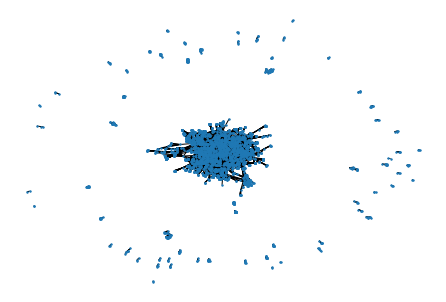

In [15]:
nx.draw(G, node_size=2) # Draw and save the co-authorship graph. Draw graph. might take some time to execute - depends on your machine.
plt.savefig("network1.pdf", bbox_inches = "tight") 